Lesson 1 k-NN Classifier Part 1

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
cancer = load_breast_cancer()
print(cancer.DESCR)

In [3]:

print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
type(cancer.data)

numpy.ndarray

In [8]:
cancer.data.shape

(569, 30)

Lesson 2 | k-NN Classifier Part-2

In [14]:
import pandas as pd
raw_data = pd.read_csv(r"C:\Users\tonya\Desktop\SpringBoardAssignments\CancerGenomicsUdemi\CGenomeFiles\breast-cancer-wisconsin-data.csv\breast-cancer-wisconsin-data.csv")
raw_data.tail(10)

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
558,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
559,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
560,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
561,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
562,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [15]:
!pip install mglearn

     -------------------------------------- 540.1/540.1 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=6939c3ef67e7abb0c363703de8bbc5efe014ab86ef199df214975591cb36705c
  Stored in directory: c:\users\tonya\appdata\local\pip\cache\wheels\e9\d2\99\350c7f8cdc04398af950df438cd94c398c8f3bc1d5f50333b5
Successfully built mglearn


c:\Users\tonya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


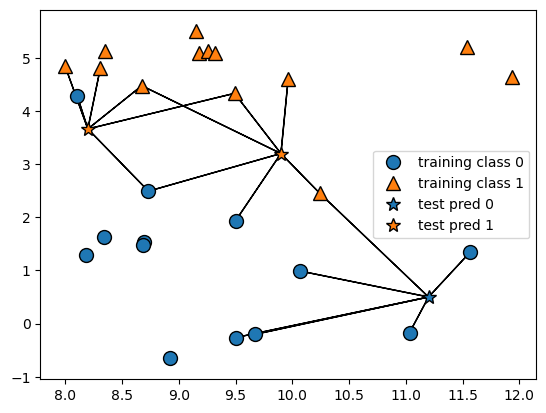

In [25]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=6)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
print('Accuracy of KNN n-5, on the training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.95
Accuracy of KNN n-5, on the test set: 0.93


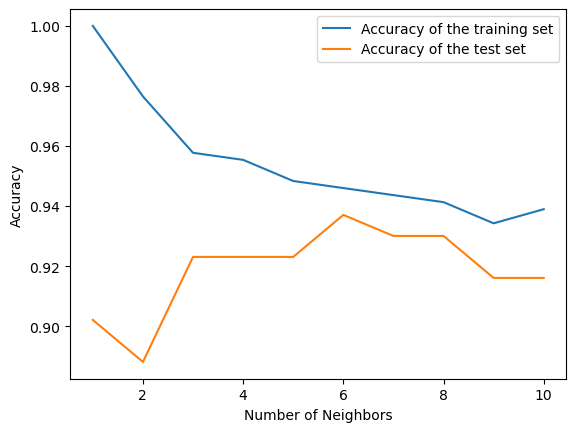

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=66)


training_accuracy = []
test_accuracy = []


neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

# Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 0)

mlp = MLPClassifier(random_state= 12)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.94
Accuracy on the test subset: 0.94


In [50]:
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis= 0)))

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=12)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.995
Accuracy on the test subset: 0.958


# Neural Networks Part: 2

In [60]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 15.4 MB/s eta 0:00:00


In [61]:
!pip install tensorflow

     ------------------------------------- 266.3/266.3 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 47.8 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 31.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 46.1 MB/s eta 0:00:00
     ---------------------------------------- 439.2/439.2 kB ? eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     --------------------------------------- 23.2/23.2 MB 27.3 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
     ---------------------------------------- 177.8/177.8 kB ? eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.19.6 which is incompatible.


In [62]:
!pip install Sequential

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Sequential: filename=sequential-1.0.0-py3-none-any.whl size=2856 sha256=e5d9ca23cfb80816f3013294310310c31bed40070566d070a13247491ca50df6
  Stored in directory: c:\users\tonya\appdata\local\pip\cache\wheels\65\bc\e9\90f85bb2378ffef06624444a93c31fe29f5c9fb83d1e3ddb94
Successfully built Sequential


In [63]:
import numpy as np
import keras.models
from keras.models import Sequential
from keras.layers import Dense

In [64]:
x = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])

![title](xor1.png)

![title](xor1.png)

In [65]:
y = np.array( [[0], [1], [1], [0]] )

In [66]:
x

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [67]:
y

array([[0],
       [1],
       [1],
       [0]])

In [68]:
model = Sequential()

In [69]:
model.add(Dense(10, input_dim=3, activation = 'relu'))

In [70]:
model.add(Dense(6, activation = 'relu'))

In [71]:
model.add(Dense(1, activation = 'sigmoid'))

![title](3_10_nn.png)

![title](sigmoid2.png)

![title](relu.png)

In [73]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [74]:
model.fit(x,y,epochs=700, batch_size=3)

Epoch 1/700
2/2 [==============================] - 1s 8ms/step - loss: 0.2121 - accuracy: 0.5000
Epoch 2/700
2/2 [==============================] - 0s 4ms/step - loss: 0.2100 - accuracy: 0.5000
Epoch 3/700
2/2 [==============================] - 0s 6ms/step - loss: 0.2089 - accuracy: 0.7500
Epoch 4/700
2/2 [==============================] - 0s 5ms/step - loss: 0.2072 - accuracy: 0.7500
Epoch 5/700
2/2 [==============================] - 0s 7ms/step - loss: 0.2064 - accuracy: 0.7500
Epoch 6/700
2/2 [==============================] - 0s 6ms/step - loss: 0.2050 - accuracy: 0.7500
Epoch 7/700
2/2 [==============================] - 0s 9ms/step - loss: 0.2039 - accuracy: 0.7500
Epoch 8/700
2/2 [==============================] - 0s 9ms/step - loss: 0.2030 - accuracy: 0.7500
Epoch 9/700
2/2 [==============================] - 0s 8ms/step - loss: 0.2019 - accuracy: 0.7500
Epoch 10/700
2/2 [==============================] - 0s 8ms/step - loss: 0.2008 - accuracy: 0.7500
Epoch 11/700
2/2 [===========

In [75]:
model.predict(np.array([[0,0,1]]))

1/1 [==============================] - 0s 86ms/step


array([[0.2982082]], dtype=float32)

![title](xor1.png)

In [76]:
model.predict(np.array([[1,1,1]]))

1/1 [==============================] - 0s 27ms/step


array([[0.9764757]], dtype=float32)

In [77]:
model.predict(np.array([[1,0,1]]))

1/1 [==============================] - 0s 29ms/step


array([[0.9703043]], dtype=float32)

In [78]:
model.predict(np.array([[0,1,1]]))

1/1 [==============================] - 0s 28ms/step


array([[0.2982082]], dtype=float32)

# Cancer Genomics | Manipulating DNA/mRNA

In [79]:
DNA = "GCATGCATGCATGCATGCATGCATGCATGCATGCAT"
print(DNA)

GCATGCATGCATGCATGCATGCATGCATGCATGCAT


In [80]:
print(DNA.count('G'))

9


In [81]:
1/4

0.25

In [82]:
print("A ratio:", (1/4) * 100, "percent")

A ratio: 25.0 percent


In [83]:
if(True):
    print("C" in DNA)

True


In [3]:
DNA1 = str(input("Please enter DNA Sequence below:\n"))
Translate_DNA1 = DNA1.maketrans("TCGA","UCGA")
print("Your RNA sequence is shown below: \n", DNA1.translate(Translate_DNA1))

Your RNA sequence is shown below: 
 UGUGGCACAGAUGCUCGUGCCACCUCAUUACUUCCUGAAACCACCAGCUUAUCGCCCAACACAGACCGAAUGAAUGUAGAAAAGGCUGAACUCUGUAAUAAAAGCAAACAGCCUGGCUUAGCAAAAAACCAACAGAGCAGUCUGGAUGAAAGUAAGGAAAUAUGUAGUGCUGGAAAGACCCUGGGUGCCCAUGAGCUGAAUGCCCAUCAUCCAUCGAGAGGAAAGAACUAGAGGAUGAGCCACAGCACCCUGAGAGCCCCAGAGGUAAUCCUCAGAACUGCCAGUCUGGAACCAAACUGAAAAGUAGUAUUCAGAAAGUUAAUGAGUGGUUAUCCAGGAGUAAUGAUAUUUUAACUUCUGAUAACUCCUAUAGUAGGAACCAUGAGCAGAAUGCAGAGAUGCCUAGUGCCUUAAAAGAUGGGUAUCCAGAUACUGCAGAUGCAAAUUCUAACAUUUCUGAGAAGACUGACCCAGUGGCUGACAUCACUUAUGAUCCCUGGCCACAUGUGCCUGAAAGAAGCUGCCCCAGGCCAGCAGAAAACAAUAACAUUGAAGAUAAAAUAUUUGGAAAAACCUAUCGGAGAAAAUCAGGUCACCCUCAUUUGAAUUGUAUAACUGAAAACUUGUUUGCUGGAGCUGUUGUUGCUCCUGAUUCUUUGAUCCCUCCAGAGCCUCCAAAAACAACCAAGUUAAAGCG


In [ ]:
#   !pip install -U ipykernel

In [6]:
len(DNA1)

697

In [11]:
e = DNA1.translate(Translate_DNA1)
e

'UGUGGCACAGAUGCUCGUGCCACCUCAUUACUUCCUGAAACCACCAGCUUAUCGCCCAACACAGACCGAAUGAAUGUAGAAAAGGCUGAACUCUGUAAUAAAAGCAAACAGCCUGGCUUAGCAAAAAACCAACAGAGCAGUCUGGAUGAAAGUAAGGAAAUAUGUAGUGCUGGAAAGACCCUGGGUGCCCAUGAGCUGAAUGCCCAUCAUCCAUCGAGAGGAAAGAACUAGAGGAUGAGCCACAGCACCCUGAGAGCCCCAGAGGUAAUCCUCAGAACUGCCAGUCUGGAACCAAACUGAAAAGUAGUAUUCAGAAAGUUAAUGAGUGGUUAUCCAGGAGUAAUGAUAUUUUAACUUCUGAUAACUCCUAUAGUAGGAACCAUGAGCAGAAUGCAGAGAUGCCUAGUGCCUUAAAAGAUGGGUAUCCAGAUACUGCAGAUGCAAAUUCUAACAUUUCUGAGAAGACUGACCCAGUGGCUGACAUCACUUAUGAUCCCUGGCCACAUGUGCCUGAAAGAAGCUGCCCCAGGCCAGCAGAAAACAAUAACAUUGAAGAUAAAAUAUUUGGAAAAACCUAUCGGAGAAAAUCAGGUCACCCUCAUUUGAAUUGUAUAACUGAAAACUUGUUUGCUGGAGCUGUUGUUGCUCCUGAUUCUUUGAUCCCUCCAGAGCCUCCAAAAACAACCAAGUUAAAGCG'

In [ ]:
# Hacking Cancer DNA

In [50]:
cancer = open('seq.txt', 'r')
g=0;
c=0;
a=0;
t=0;

cancer.readline()

for line in cancer:
    line = line.lower()
    for char in line:
        if char == 'g':
            g+=1
        if char == 'c':
            c+=1
        if char == 'a':
            a+=1
        if char == 't':
            t+=1
            
print("number of g's " + str(g))
print("number of c's " + str(c))
print("number of a's " + str(a))
print("number of t's " + str(t))

gc = (g + c + 0.) / (a + t + g + c + 0.)

print("gc content: " + str(gc))

number of g's 154
number of c's 158
number of a's 235
number of t's 155
gc content: 0.4444444444444444
